In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('CSV_files/nba_players.csv')

In [2]:
print('Data shape:', data.shape)
data.info()

Data shape: (1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1000 non-null   int64 
 1   first_name    1000 non-null   object
 2   last_name     1000 non-null   object
 3   position      87 non-null     object
 4   id_team       1000 non-null   int64 
 5   abbreviation  1000 non-null   object
 6   city          1000 non-null   object
 7   conference    1000 non-null   object
 8   division      1000 non-null   object
 9   full_name     1000 non-null   object
 10  name          1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


In [3]:
print(data.value_counts('position'))

position
G      40
F      28
C      13
C-F     2
F-C     2
G-F     2
Name: count, dtype: int64


In [4]:
data.isnull().sum()

id                0
first_name        0
last_name         0
position        913
id_team           0
abbreviation      0
city              0
conference        0
division          0
full_name         0
name              0
dtype: int64

In [5]:
data['position_filled'] = data['position'].fillna('NaN')

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Position_encoded'] = label_encoder.fit_transform(data['position'])


In [7]:
# Total and percentage of missing values
missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100
missing_df = pd.DataFrame({"Missing Values": missing, "Percent": missing_percent})
print(missing_df[missing_df["Missing Values"] > 0].sort_values("Percent", ascending=False))


          Missing Values  Percent
position             913     91.3


In [8]:
print("\nPosition Value Counts:\n", data['position'].value_counts(dropna=False))
print("\nConference Value Counts:\n", data['conference'].value_counts())
print("\nDivision Value Counts:\n", data['division'].value_counts())



Position Value Counts:
 position
NaN    913
G       40
F       28
C       13
C-F      2
F-C      2
G-F      2
Name: count, dtype: int64

Conference Value Counts:
 conference
West    504
East    496
Name: count, dtype: int64

Division Value Counts:
 division
Southeast    191
Pacific      190
Northwest    181
Central      166
Atlantic     139
Southwest    133
Name: count, dtype: int64


<Axes: xlabel='position', ylabel='count'>

Text(0.5, 1.0, 'Player Count by Position')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'G'),
  Text(1, 0, 'F'),
  Text(2, 0, 'C'),
  Text(3, 0, 'C-F'),
  Text(4, 0, 'F-C'),
  Text(5, 0, 'G-F')])

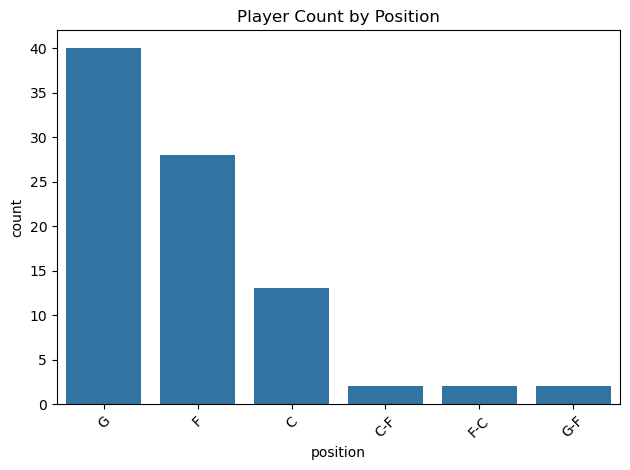

In [10]:
sns.countplot(data=data, x='position', order=data['position'].value_counts().index)
plt.title("Player Count by Position")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('player count by position', dpi = 300)
plt.show()


C:\Users\Ken\AppData\Local\Temp\ipykernel_18192\746311799.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='conference', palette='Set2')


<Axes: xlabel='conference', ylabel='count'>

Text(0.5, 1.0, 'Players per Conference')

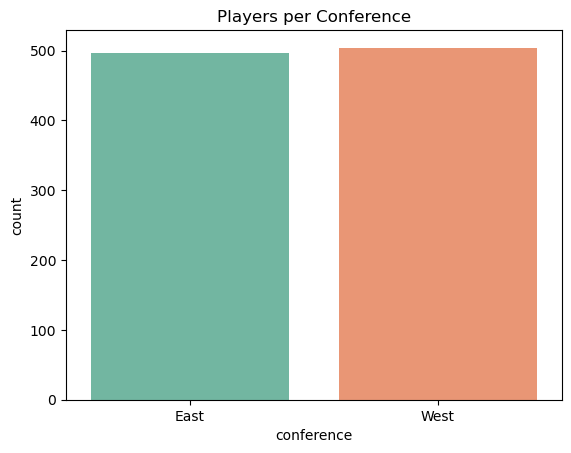

In [13]:
sns.countplot(data=data, x='conference', palette='Set2')
plt.title("Players per Conference")
plt.sa
plt.show()
